# Exploratory Data Analysis (EDA) Workshop: 
# - Internet Fijo en Colombia (2015–2019): Accesos por tecnología y segmento

**Fecha de creación:** 2025-09-09  
**Autores:** *OSCAR ANDRES FLOREZ RAMOS Y *  
**Curso / Semana:** Analítica de Datos – Semana 5

Este notebook realiza un **Análisis Exploratorio de Datos (EDA)** sobre el dataset de **Internet Fijo – Accesos por tecnología y segmento** publicado en **datos.gov.co** (2015–4T a 2019–1T).
El objetivo es **limpiar, explorar y visualizar** la información para extraer *insights* accionables sobre adopción tecnológica, velocidades, segmentos, proveedores y brechas territoriales.

## 1. Introducción y objetivos

**Objetivos específicos:**
- Validar y documentar la estructura del dataset (columnas, tipos, rangos).
- Efectuar limpieza (valores faltantes, duplicados, atípicos/errores).
- Describir la distribución univariada (por columna) y relaciones bivariadas (correlaciones).
- Producir **≥ 10 visualizaciones** bien rotuladas que soporten hallazgos.
- Formular **≥ 5 insights** accionables conectados con decisiones de política/negocio.

**Sobre el dataset:**
- Fuente: datos.gov.co → *Internet Fijo – Accesos por tecnología y segmento* (código: `n48w-gutb`).
- Cobertura: Colombia, 2015–4T a 2019–1T.
- Granularidad: proveedor × departamento × municipio × segmento × tecnología × velocidades × suscriptores.
- Tamaño esperado: ~2.79M filas y ~12 columnas.

**¿Por qué es importante?**
- Permite medir la evolución de la conectividad en Colombia (2015–2019) y detectar brechas territoriales.

- Identifica qué tecnologías y proveedores lideran el mercado, útil para decisiones de política pública y estrategias empresariales.

- Ayuda a analizar calidad de servicio (velocidades) y su relación con la demanda.

- Facilita detectar zonas críticas con baja penetración, priorizando inversión en infraestructura.

- Contribuye a evaluar el avance en la inclusión digital y su vínculo con el desarrollo social y económico.

## 2. Configuración del ambiente e importación de librerías

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration for better display
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Environment setup complete!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Environment setup complete!
Pandas version: 2.3.1
NumPy version: 2.3.2


## 3. Carga de datos y exploración inicial
- 3.1. Carga del conjunto de datos

In [12]:
# Load the dataset
df = pd.read_csv('Internet_Fijo_Accesos_por_tecnología_y_segmento_20250909.csv')

# Get basic information
print("📊 Dataset Loaded Successfully!")
print("="*50)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*50)

📊 Dataset Loaded Successfully!
Shape: 2,795,052 rows × 12 columns
Memory usage: 1301.19 MB


--> PREGUNTAS INICIALES AQUI <--

- 3.2. Examinar los nombres y la estructura de las columnas

In [13]:
# Display first 20 columns to understand the structure
print("📋 First 20 Column Names:")
print("="*50)
for i, col in enumerate(df.columns[:20], 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*50)
print(f"Total columns: {len(df.columns)}")

📋 First 20 Column Names:
 1. AÑO
 2. TRIMESTRE
 3. PROVEEDOR
 4. COD_DEPARTAMENTO
 5. DEPARTAMENTO
 6. COD_MUNICIPIO
 7. MUNICIPIO
 8. SEGMENTO
 9. TECNOLOGIA
10. VELOCIDAD_BAJADA
11. VELOCIDAD_SUBIDA
12. No DE ACCESOS

Total columns: 12


In [14]:
# Check data types distribution
print("📊 Data Types Distribution:")
print("="*50)
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{dtype}: {count} columns ({count/len(df.columns)*100:.1f}%)")

df['SEGMENTO'].max()
df['SEGMENTO'].min()

📊 Data Types Distribution:
object: 7 columns (58.3%)
int64: 3 columns (25.0%)
float64: 2 columns (16.7%)


'CORPORATIVO'

- 3.3. Vista previa de los datos

In [15]:
# Select important columns for initial viewing
important_cols = [
    'AÑO', 'TRIMESTRE', 'PROVEEDOR', 'COD_DEPARTAMENTO', 'DEPARTAMENTO',
    'COD_MUNICIPIO', 'MUNICIPIO', 'SEGMENTO', 'TECNOLOGIA', 'VELOCIDAD_BAJADA',
    'VELOCIDAD_SUBIDA', 'No DE ACCESOS'
]

# Check which columns exist in your dataset
existing_cols = [col for col in important_cols if col in df.columns]

print("🔍 Sample Data (First 5 rows):")
print("Columns found:", existing_cols)
df[existing_cols].head(20)

🔍 Sample Data (First 5 rows):
Columns found: ['AÑO', 'TRIMESTRE', 'PROVEEDOR', 'COD_DEPARTAMENTO', 'DEPARTAMENTO', 'COD_MUNICIPIO', 'MUNICIPIO', 'SEGMENTO', 'TECNOLOGIA', 'VELOCIDAD_BAJADA', 'VELOCIDAD_SUBIDA', 'No DE ACCESOS']


,AÑO,TRIMESTRE,PROVEEDOR,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,SEGMENTO,TECNOLOGIA,VELOCIDAD_BAJADA,VELOCIDAD_SUBIDA,No DE ACCESOS
0,2018,1,EDATEL S.A.,5.0,ANTIOQUIA,5042.0,SANTAFÉ DE ANTIOQUIA,CORPORATIVO,XDSL,"8,00","1,00",25
1,2019,1,AXESS NETWORKS SOLUTIONS COLOMBIA SAS,52.0,NARIÑO,52473.0,MOSQUERA,CORPORATIVO,SATELITAL,"0,06","0,06",2
2,2019,1,TELMEX COLOMBIA S.A.,25.0,CUNDINAMARCA,25269.0,FACATATIVÁ,CORPORATIVO,CABLE,"40,00","8,00",55
3,2019,1,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,8.0,ATLÁNTICO,8685.0,SANTO TOMÁS,RESIDENCIAL - ESTRATO 1,XDSL,"8,00","1,00",1
4,2020,2,SINERGY SOLUCIONES INTEGRALES S.A.S,41.0,HUILA,41551.0,PITALITO,RESIDENCIAL - ESTRATO 1,WIFI,"2,50","0,68",37
5,2019,2,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,68.0,SANTANDER,68077.0,BARBOSA,RESIDENCIAL - ESTRATO 3,XDSL,"14,00","1,00",1
6,2020,1,COMUNICACION CELULAR S A COMCEL S A,50.0,META,50001.0,VILLAVICENCIO,RESIDENCIAL - ESTRATO 6,CABLE,"5,12","1,02",15
7,2019,1,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,25.0,CUNDINAMARCA,25473.0,MOSQUERA,RESIDENCIAL - ESTRATO 2,OTRAS TECNOLOGÍAS DE FIBRA (ANTES FTTX),"11,00","1,00",1
8,2018,4,TELMEX COLOMBIA S.A.,76.0,VALLE DEL CAUCA,76001.0,CALI,RESIDENCIAL - ESTRATO 6,CABLE,"15,00","5,00",4
9,2020,1,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,25.0,CUNDINAMARCA,25899.0,ZIPAQUIRÁ,RESIDENCIAL - ESTRATO 1,OTRAS TECNOLOGÍAS DE FIBRA (ANTES FTTX),"2,00","1,00",1


In [17]:
# Elements per colum counter

print(df["AÑO"].value_counts())
print(df["DEPARTAMENTO"].value_counts())

AÑO
2022    754858
2023    614227
2021    399848
2020    342123
2019    293282
2018    233772
2017    156886
2016        56
Name: count, dtype: int64
DEPARTAMENTO
ANTIOQUIA                                                   408403
CUNDINAMARCA                                                381321
VALLE DEL CAUCA                                             256229
SANTANDER                                                   176953
BOYACÁ                                                      143370
TOLIMA                                                      105115
ATLÁNTICO                                                    98811
CALDAS                                                       98548
NORTE DE SANTANDER                                           93347
RISARALDA                                                    86039
BOGOTÁ D.C.                                                  83293
HUILA                                                        82686
BOLÍVAR                          

## 4. Evaluación de la calidad de los datos

- 4.1. Analisis de los valores faltantes:

In [9]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

# Filter columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0]
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

print("🔍 Missing Values Analysis:")
print("="*50)
print(f"Columns with missing values: {len(missing_data)} out of {len(df.columns)}")
print(f"Total missing cells: {df.isnull().sum().sum():,}")
print(f"Percentage of dataset with missing values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Show top 10 columns with most missing values
print("\nTop 5 columns with missing values:")
missing_data.head()

🔍 Missing Values Analysis:
Columns with missing values: 2 out of 12
Total missing cells: 15
Percentage of dataset with missing values: 0.00%

Top 5 columns with missing values:


,Column,Missing_Count,Missing_Percentage
COD_MUNICIPIO,COD_MUNICIPIO,10,0.000358
COD_DEPARTAMENTO,COD_DEPARTAMENTO,5,0.000179


- 4.2. Visualizar el patrón de valores faltantes

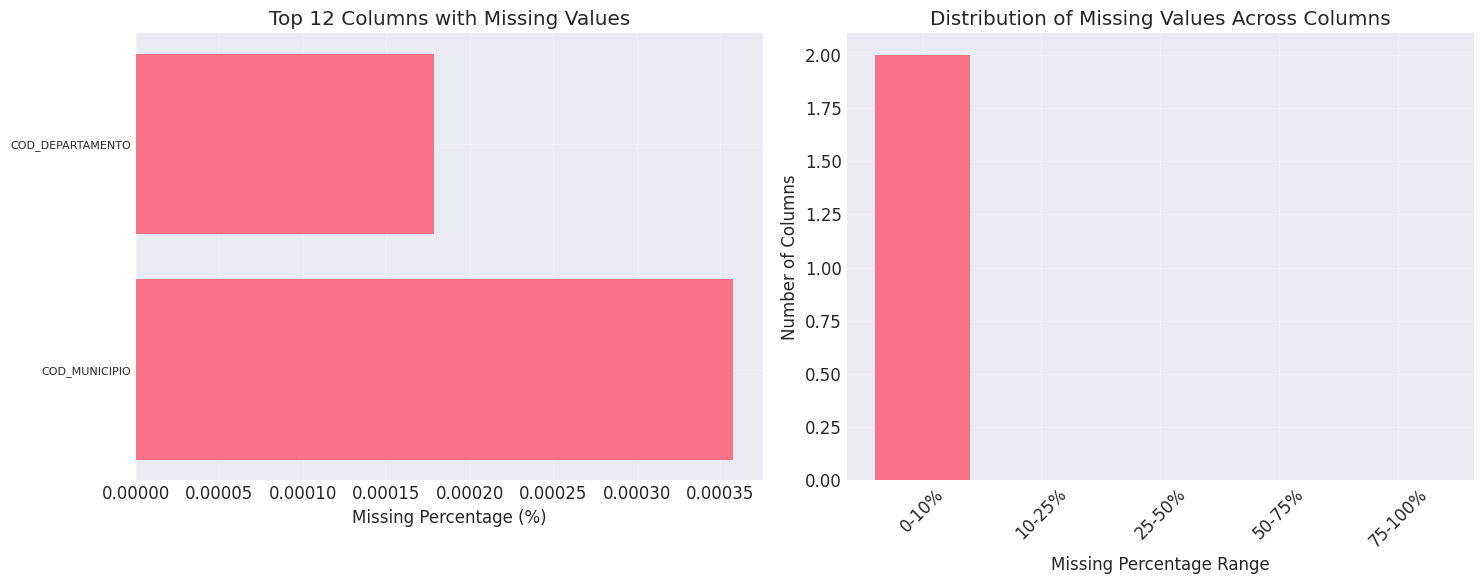

In [10]:
# Create visualization of missing values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Top 12 columns with most missing values
top_missing = missing_data.head(12)
ax1.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
ax1.set_yticks(range(len(top_missing)))
ax1.set_yticklabels(top_missing['Column'], fontsize=8)
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_title('Top 12 Columns with Missing Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution of missing values
missing_bins = [0, 10, 25, 50, 75, 100]
missing_labels = ['0-10%', '10-25%', '25-50%', '50-75%', '75-100%']
missing_data['Missing_Bin'] = pd.cut(
    missing_data['Missing_Percentage'], 
    bins=missing_bins, 
    labels=missing_labels
)
missing_dist = missing_data['Missing_Bin'].value_counts()

ax2.bar(range(len(missing_dist)), missing_dist.values)
ax2.set_xticks(range(len(missing_dist)))
ax2.set_xticklabels(missing_dist.index, rotation=45)
ax2.set_ylabel('Number of Columns')
ax2.set_xlabel('Missing Percentage Range')
ax2.set_title('Distribution of Missing Values Across Columns')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

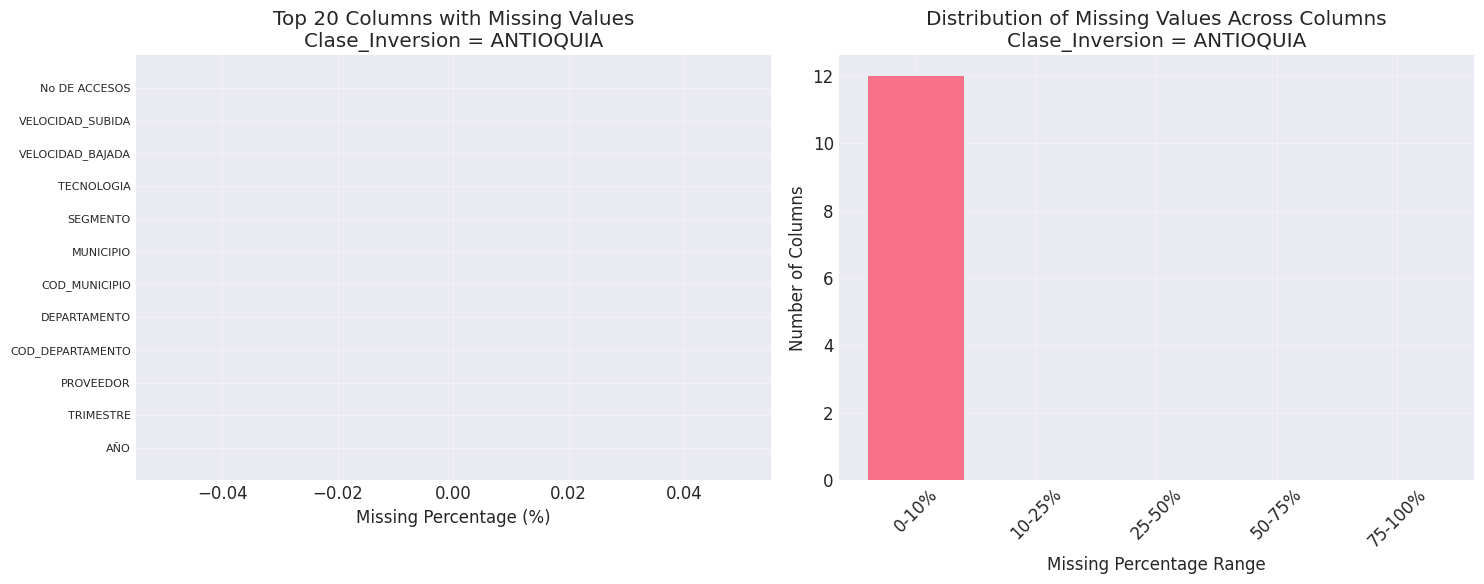

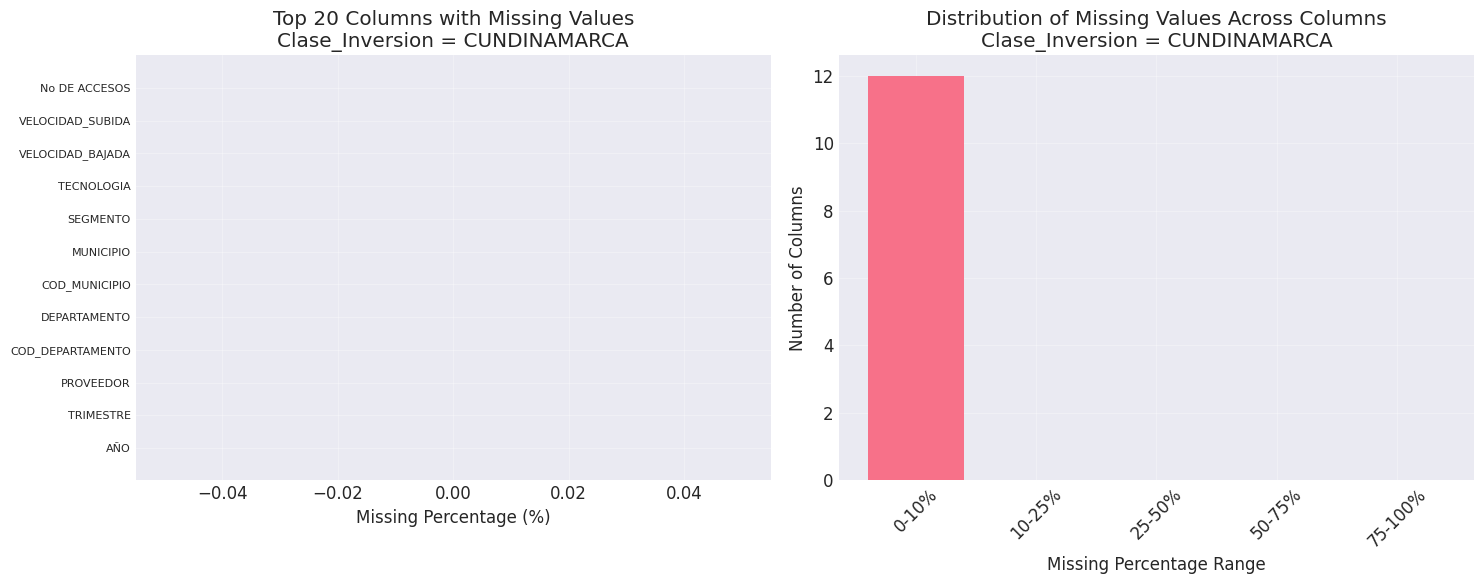

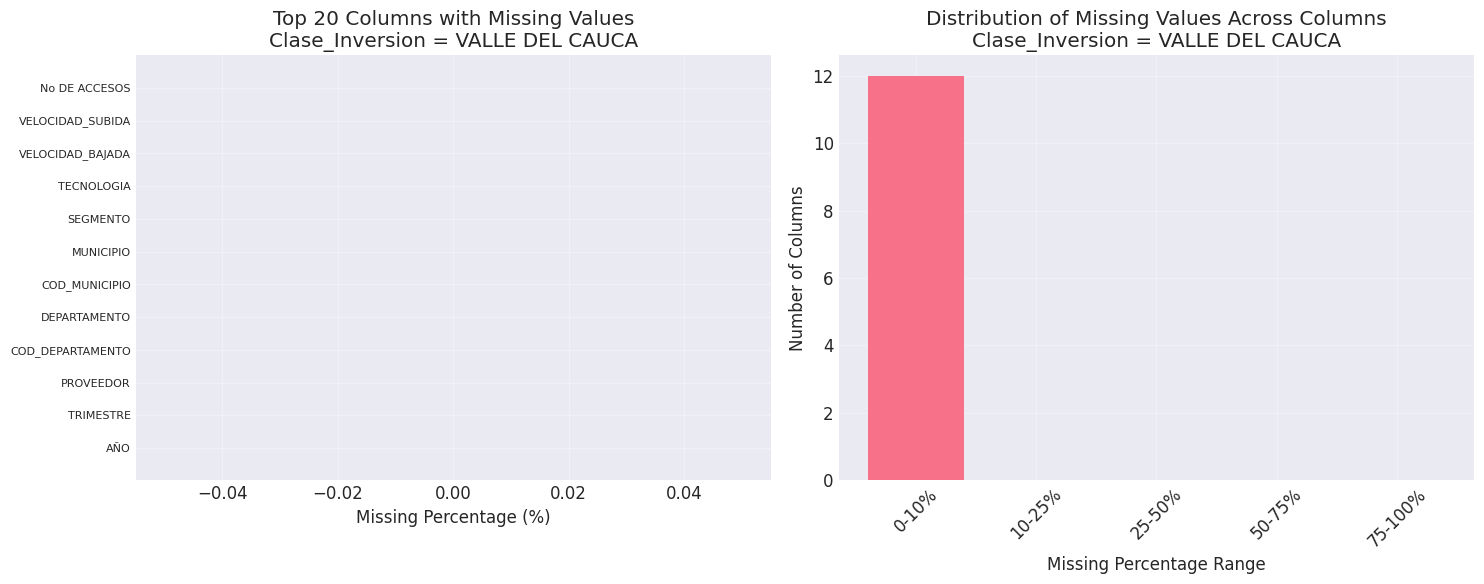

In [18]:
# Clases a graficar
clases = ["ANTIOQUIA", "CUNDINAMARCA", "VALLE DEL CAUCA"]

for clase in clases:
    # Filtrar por clase de inversión
    subdf = df[df["DEPARTAMENTO"] == clase]

    if subdf.empty:
        print(f"⚠️ No hay filas para Clase_Inversion = {clase}. Se omite el gráfico.")
        continue

    # Calcular % de faltantes por columna para el sub-dataframe
    # (mean() sobre isna() da proporción; *100 para porcentaje)
    missing_pct = subdf.isna().mean().mul(100)

    # Armar tabla ordenada de faltantes
    missing_data = (
        missing_pct.to_frame(name="Missing_Percentage")
        .reset_index()
        .rename(columns={"index": "Column"})
        .sort_values("Missing_Percentage", ascending=False)
        .reset_index(drop=True)
    )

    # Crear la figura con 2 subplots (exactamente como tu diseño)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # ==== Plot 1: Top 20 columnas con más faltantes ====
    top_missing = missing_data.head(20)
    ax1.barh(range(len(top_missing)), top_missing["Missing_Percentage"])
    ax1.set_yticks(range(len(top_missing)))
    ax1.set_yticklabels(top_missing["Column"], fontsize=8)
    ax1.set_xlabel("Missing Percentage (%)")
    ax1.set_title(f"Top 20 Columns with Missing Values\nClase_Inversion = {clase}")
    ax1.grid(True, alpha=0.3)

    # ==== Plot 2: Distribución de % de faltantes por bins ====
    missing_bins = [0, 10, 25, 50, 75, 100]
    missing_labels = ["0-10%", "10-25%", "25-50%", "50-75%", "75-100%"]

    # Usar una copia para no ensuciar la tabla original
    tmp = missing_data.copy()
    tmp["Missing_Bin"] = pd.cut(
        tmp["Missing_Percentage"],
        bins=missing_bins,
        labels=missing_labels,
        include_lowest=True,
        right=True
    )

    # Contar por bin y asegurar el orden completo de etiquetas
    missing_dist = (
        tmp["Missing_Bin"]
        .value_counts(sort=False)
        .reindex(missing_labels, fill_value=0)
    )

    ax2.bar(range(len(missing_dist)), missing_dist.values)
    ax2.set_xticks(range(len(missing_dist)))
    ax2.set_xticklabels(missing_dist.index, rotation=45)
    ax2.set_ylabel("Number of Columns")
    ax2.set_xlabel("Missing Percentage Range")
    ax2.set_title(f"Distribution of Missing Values Across Columns\nClase_Inversion = {clase}")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()